In [ ]:
Project 2 : Customer Segmentation Analysis  


 Data Collection  - Required  the  Libraies  Imports

In [122]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [81]:
data = pd.read_csv('Desktop/Obasis project1/Customer Segmentation Analysis Project  2 Level 1/ifood_df.csv')

In [83]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:

 Data Exploration and Cleaning

In [85]:
data.shape

(2205, 39)

In [87]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [89]:
data.dtypes

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

In [91]:
data.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO


 Descriptive Statistics

In [92]:
data.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

In [95]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [97]:

# Calculate total purchase value by summing relevant columns
df['Total Purchase Value'] = (
    df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
    df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
)

# Calculate the average purchase value
average_purchase_value = df['Total Purchase Value'].mean()
print(f"Average Purchase Value: {average_purchase_value}")

Average Purchase Value: 606.821768707483



 Customer Segmentation

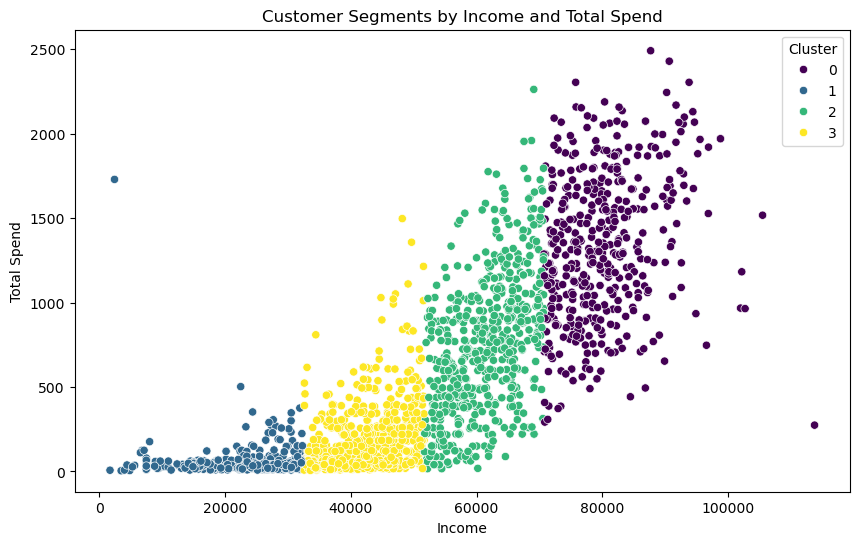

In [99]:
# Visualize the customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='MntTotal', hue='Cluster', palette='viridis')
plt.title('Customer Segments by Income and Total Spend')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.legend(title='Cluster')
plt.show()


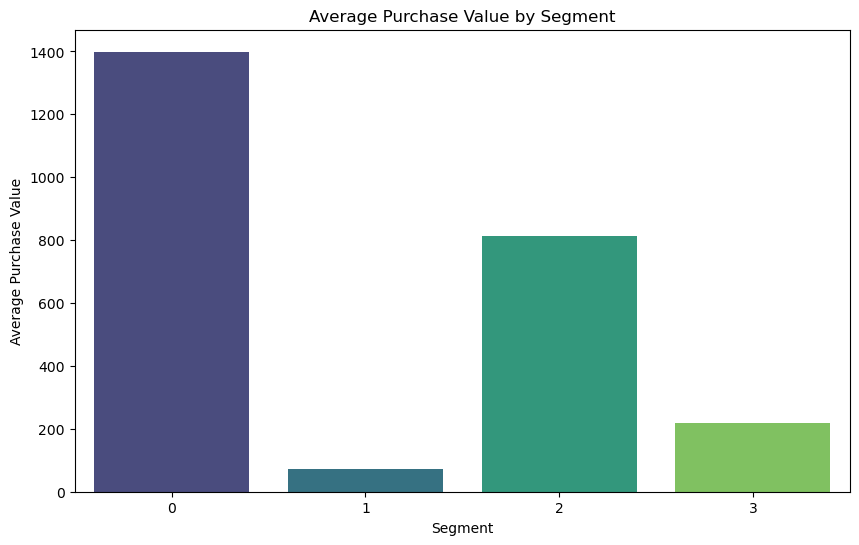

In [100]:
# Calculate average purchase value by segment
segment_avg_purchase = df.groupby('Cluster')['Total Purchase Value'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=segment_avg_purchase, x='Cluster', y='Total Purchase Value', palette='viridis')
plt.title('Average Purchase Value by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Purchase Value')
plt.show()


Visualization

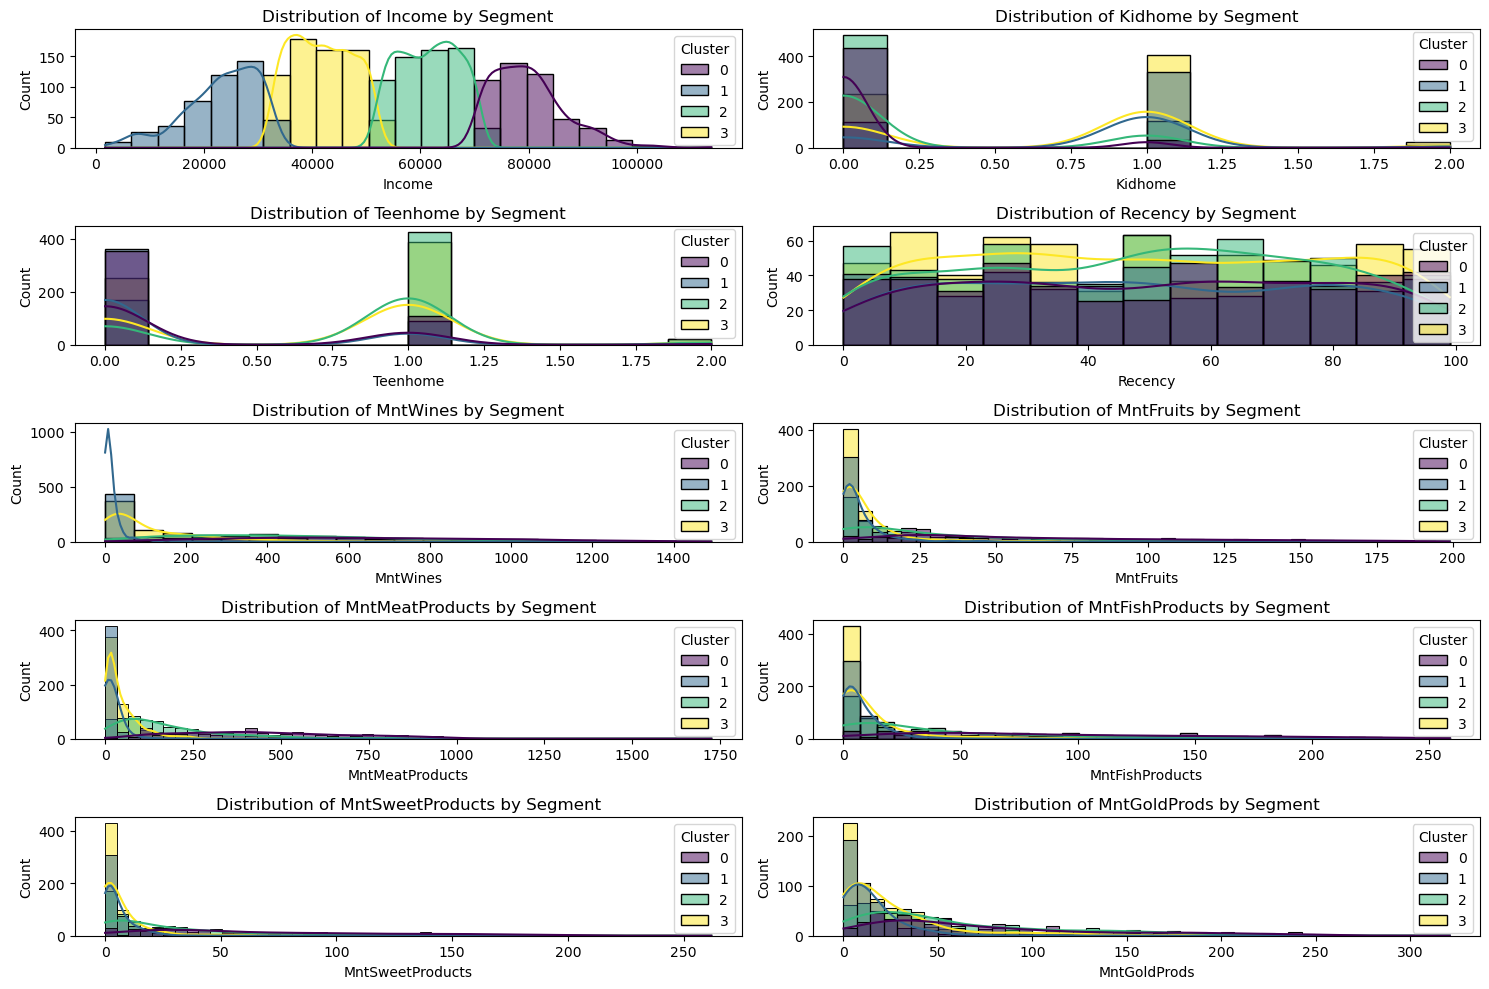

In [101]:
plt.figure(figsize=(15, 10))

# List of features to plot
features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
            'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
            'MntSweetProducts', 'MntGoldProds']

# Create subplots for each feature
for i, feature in enumerate(features):
    plt.subplot(5, 2, i+1)
    sns.histplot(data=df, x=feature, hue='Cluster', kde=True, palette='viridis')
    plt.title(f'Distribution of {feature} by Segment')

plt.tight_layout()
plt.show()



 Insights and Recommendations: Analyze characteristics of each segment and provide
  insights 

In [115]:
segment_analysis = df.groupby('Cluster').mean().reset_index()
print(segment_analysis)


   Cluster        Income   Kidhome  Teenhome    Recency    MntWines  \
0        0  79910.548936  0.076596  0.263830  49.700000  651.676596   
1        1  23279.883516  0.782418  0.206593  48.432967   17.145055   
2        2  61474.437601  0.215559  0.758509  48.669368  459.635332   
3        3  41850.205128  0.678733  0.650075  49.230769  116.755656   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0  63.768085       448.429787        92.172340         68.591489  ...   
1   5.520879        20.817582         7.993407          5.738462  ...   
2  33.137763       184.431118        44.625608         31.662885  ...   
3   7.978884        45.980392        13.214178          8.194570  ...   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0       0.040426            0.085106         0.000000              0.553191   
1       0.017582            0.140659         0.116484              0.520879   
2       0.042139            0.071313     


 Bar chart comparing average purchase value, income, and product spending by segment

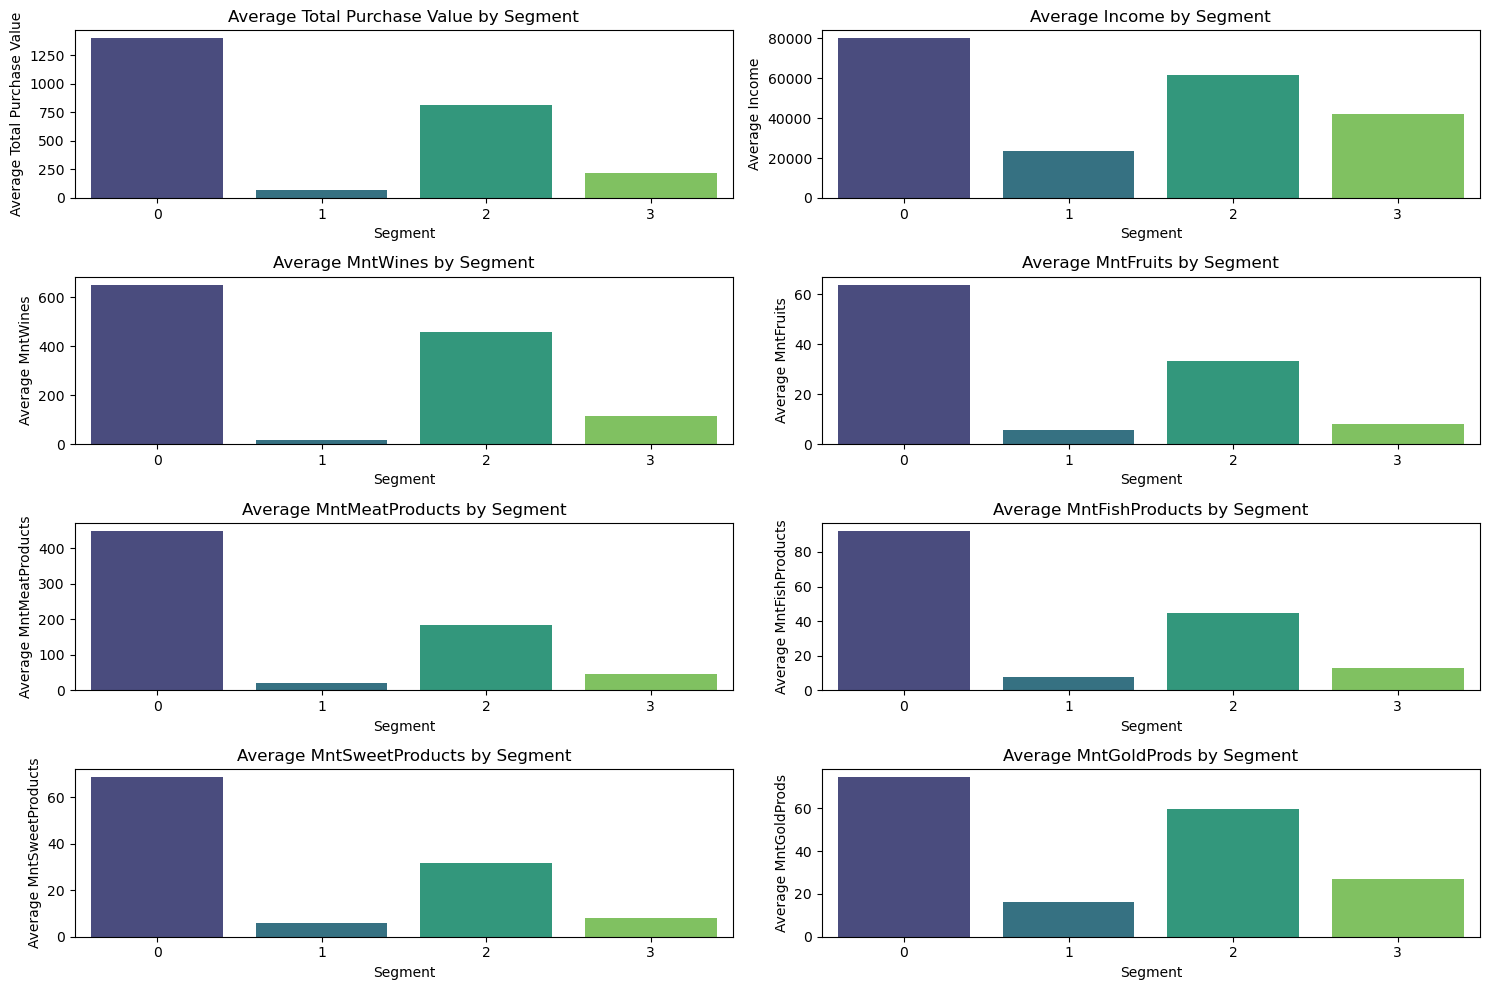

In [120]:
features_to_compare = ['Total Purchase Value', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                       'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_compare):
    plt.subplot(4, 2, i+1)
    sns.barplot(data=segment_analysis, x='Cluster', y=feature, palette='viridis')
    plt.title(f'Average {feature} by Segment')
    plt.xlabel('Segment')
    plt.ylabel(f'Average {feature}')

plt.tight_layout()
plt.show()